In [21]:
import networkx as nx
import numpy as np
import pandas as pd 
import operator
import matplotlib.pyplot as plt
import random

In [22]:
nx_graphs = []
agg_graph = nx.MultiGraph()
venue_df_list = []
for i in range(31):
    # with open(f'..\ATX_Networks\sim_day_{i+1}.gexf') as graph_file:
    nx_graphs.append(nx.read_gexf(f'..\ATX_Networks\sim_day_{i+1}.gexf'))
    venue_df_list.append(nx.to_pandas_edgelist(nx_graphs[i],source="Source",target="Target"))

concat_venue_df = pd.concat(venue_df_list)
# concat_venue_df.columns = ['source','target','venueid']
concat_venue_df.head()


,Source,Target,venueid,visits,hour,id,time_spent
0,2adee8895bc53ddebe8fb9c8a532f8bb5105a0d5bdcfd7...,d531979041494d0d0d2387cfc611f6e70d91bcb92cf966...,440da2cbf964a52091301fe3,18,2,0,976
1,2adee8895bc53ddebe8fb9c8a532f8bb5105a0d5bdcfd7...,cf4e564f4c8e3aecc9dacafce90cada3eabaff58464e74...,440da2cbf964a52091301fe3,2,2,1,100
2,2adee8895bc53ddebe8fb9c8a532f8bb5105a0d5bdcfd7...,594a39e074fda9219102eff386f3da1944494aaa18c036...,440da2cbf964a52091301fe3,2,4,2,14
3,2adee8895bc53ddebe8fb9c8a532f8bb5105a0d5bdcfd7...,a1470e73f1bc4f7c757c49138afd84bd1ad09e9277526a...,440da2cbf964a52091301fe3,3,5,3,148
4,2adee8895bc53ddebe8fb9c8a532f8bb5105a0d5bdcfd7...,6f8848838f9afe5a7b38c23ad5018179f69e518ee721ba...,440da2cbf964a52091301fe3,9,5,4,526


In [23]:
places_df = pd.read_csv("../RVF_ATX_PID_HZ_Places_Lookup.tsv",delimiter='\t')
merged_df = concat_venue_df.merge(places_df, on='venueid')
merged_df.head()

,Source,Target,venueid,visits,hour,id,time_spent,venuename,address,city,...,level1cat,level2catId,level2cat,level3catId,level3cat,chainid,chainname,parentvenueid,zip,sample
0,2adee8895bc53ddebe8fb9c8a532f8bb5105a0d5bdcfd7...,d531979041494d0d0d2387cfc611f6e70d91bcb92cf966...,440da2cbf964a52091301fe3,18,2,0,976,Austin Bergstrom International Airport (AUS),3600 Presidential Blvd,Austin,...,Travel & Transport,4bf58dd8d48988d1ed931735,Airports,NaN,NaN,NaN,NaN,NaN,78719,us_all
1,2adee8895bc53ddebe8fb9c8a532f8bb5105a0d5bdcfd7...,cf4e564f4c8e3aecc9dacafce90cada3eabaff58464e74...,440da2cbf964a52091301fe3,2,2,1,100,Austin Bergstrom International Airport (AUS),3600 Presidential Blvd,Austin,...,Travel & Transport,4bf58dd8d48988d1ed931735,Airports,NaN,NaN,NaN,NaN,NaN,78719,us_all
2,2adee8895bc53ddebe8fb9c8a532f8bb5105a0d5bdcfd7...,594a39e074fda9219102eff386f3da1944494aaa18c036...,440da2cbf964a52091301fe3,2,4,2,14,Austin Bergstrom International Airport (AUS),3600 Presidential Blvd,Austin,...,Travel & Transport,4bf58dd8d48988d1ed931735,Airports,NaN,NaN,NaN,NaN,NaN,78719,us_all
3,2adee8895bc53ddebe8fb9c8a532f8bb5105a0d5bdcfd7...,a1470e73f1bc4f7c757c49138afd84bd1ad09e9277526a...,440da2cbf964a52091301fe3,3,5,3,148,Austin Bergstrom International Airport (AUS),3600 Presidential Blvd,Austin,...,Travel & Transport,4bf58dd8d48988d1ed931735,Airports,NaN,NaN,NaN,NaN,NaN,78719,us_all
4,2adee8895bc53ddebe8fb9c8a532f8bb5105a0d5bdcfd7...,6f8848838f9afe5a7b38c23ad5018179f69e518ee721ba...,440da2cbf964a52091301fe3,9,5,4,526,Austin Bergstrom International Airport (AUS),3600 Presidential Blvd,Austin,...,Travel & Transport,4bf58dd8d48988d1ed931735,Airports,NaN,NaN,NaN,NaN,NaN,78719,us_all


In [24]:
#time_spent, hour, zip, visits, venueid
unique_venues = set(merged_df["venueid"])
unique_hours = set(np.arange(25))
max_time_spent = merged_df['time_spent'].max()
min_time_spent = merged_df['time_spent'].min()
max_visits = merged_df['visits'].max()
min_visits = merged_df['visits'].min()
time_spent_range = set(np.arange(min_time_spent, max_time_spent+1))
visit_range = set(np.arange(min_visits,max_visits+1))
print(f"The range of time spent is from {min_time_spent} to {max_time_spent}")


The range of time spent is from 0 to 3420


In [25]:
source_set = set(merged_df['Source'].unique())
target_set = set(merged_df['Target'].unique())
node_set = source_set.union(target_set)

In [26]:
# #Generate negative samples

# neg_df = pd.DataFrame(columns=["Source, Target, venueid, hour, time_spent, visits"])
# count = 0
# while len(neg_df) < len(merged_df):
#     neg_edge = random.sample(node_set,k=2)
#     if len(merged_df.loc[
#     ((merged_df['Source']==neg_edge[0]) &
#     ((merged_df['Target'])==neg_edge[1])) | 
#     ((merged_df['Target']==neg_edge[0]) &
#     ((merged_df['Source'])==neg_edge[1]))])==0:
#         # print("new neg sample")
#         sample_hour = random.sample(unique_hours,k=1)
#         sample_time_spent = random.sample(time_spent_range,k=1)
#         sample_venueid = random.sample(unique_venues, k=1)
#         sample_visits = random.sample(visit_range,k=1)
#         neg_df = neg_df.append({
#             "Source":neg_edge[0],
#             "Target":neg_edge[1],
#             "venueid":sample_venueid,
#             "hour":sample_hour,
#             "time_spent":sample_time_spent,
#             "visits":sample_visits
#         }, ignore_index=True)
#         count+=1
#         if (count%100==0):
#             print(f"{(count/len(merged_df['Source'])*100)}")
#         if (count%10000==0):
#             neg_df.to_csv(f"neg_samples_{count}.csv")



In [27]:
neg_df = pd.read_csv("neg_samples_180000.csv")
features_df_neg = neg_df.copy()[["Source","Target","venueid","hour","time_spent","visits"]]
features_df_neg["link"] = 0
features_df_neg = features_df_neg.astype({"hour":"int32","visits":"int32","time_spent":"int32"})
features_df_neg.head()

,Source,Target,venueid,hour,time_spent,visits,link
0,4ed23ffbfe4a8997f5172d7d2da88b7b75357e4c21af6f...,d8e4658adb2cd20d208eb6f089e4c482bf7ec7fa084ea9...,4b8ab9c1f964a520a67c32e3,3,2062,25,0
1,eaa72c4becae4d2ab3591148f4108b054c4e4131b462c6...,c4a8e52f2e668dce7bde2ba9bc8d25403304f22b5af3d8...,52d182ce498e318bf44252b9,0,582,28,0
2,166a77ec53a664b5843209ffae9096aa8c3c0d7c50b6be...,76f0a03ed49c23a4c355887bcc17d3804ee59ef86af438...,5df64969ee0c6b0008830f39,7,1150,6,0
3,4ee265480f8d034e23799a86ca77bbd4714184ed0bb762...,db8d399352dce3ce77907a63b0b46868d8fafb952c7512...,4c043267187ec928eabcb67b,2,2091,24,0
4,f25ea6a51502faa56c1cad5879d4731686acb9563da459...,6412ee7431487ab88234c16c2c871a942d325d86a6992b...,5bf342d2418686002c8d6005,5,1148,25,0


In [28]:

features_df_pos = merged_df.copy()[["Source","Target","venueid","hour","time_spent","visits"]]
features_df_pos["link"] = 1
features_df_pos.head()

,Source,Target,venueid,hour,time_spent,visits,link
0,2adee8895bc53ddebe8fb9c8a532f8bb5105a0d5bdcfd7...,d531979041494d0d0d2387cfc611f6e70d91bcb92cf966...,440da2cbf964a52091301fe3,2,976,18,1
1,2adee8895bc53ddebe8fb9c8a532f8bb5105a0d5bdcfd7...,cf4e564f4c8e3aecc9dacafce90cada3eabaff58464e74...,440da2cbf964a52091301fe3,2,100,2,1
2,2adee8895bc53ddebe8fb9c8a532f8bb5105a0d5bdcfd7...,594a39e074fda9219102eff386f3da1944494aaa18c036...,440da2cbf964a52091301fe3,4,14,2,1
3,2adee8895bc53ddebe8fb9c8a532f8bb5105a0d5bdcfd7...,a1470e73f1bc4f7c757c49138afd84bd1ad09e9277526a...,440da2cbf964a52091301fe3,5,148,3,1
4,2adee8895bc53ddebe8fb9c8a532f8bb5105a0d5bdcfd7...,6f8848838f9afe5a7b38c23ad5018179f69e518ee721ba...,440da2cbf964a52091301fe3,5,526,9,1


In [29]:
features_df_pos = features_df_pos.merge(places_df[['level1cat','venueid']], on='venueid')

In [30]:
features_df_neg = features_df_neg.merge(places_df[['level1cat','venueid']], on='venueid')

In [31]:

size = len(node_set)
node_encodings = np.arange(size)
node_list = list(node_set)



In [32]:
node_encoding_df = pd.DataFrame({'Node':node_list,'Source_Encoding':node_encodings})
encoded_df = features_df_pos.merge(node_encoding_df, left_on='Source',right_on='Node')
node_encoding_df = pd.DataFrame({'Node':node_list,'Target_Encoding':node_encodings})
encoded_df = encoded_df.merge(node_encoding_df, left_on='Target',right_on='Node')
encoded_df_pos = encoded_df.drop(['Node_x','Node_y'],axis=1)


In [33]:
node_encoding_df = pd.DataFrame({'Node':node_list,'Source_Encoding':node_encodings})
encoded_df = features_df_neg.merge(node_encoding_df, left_on='Source',right_on='Node')
node_encoding_df = pd.DataFrame({'Node':node_list,'Target_Encoding':node_encodings})
encoded_df = encoded_df.merge(node_encoding_df, left_on='Target',right_on='Node')
encoded_df_neg = encoded_df.drop(['Node_x','Node_y'],axis=1)

In [34]:
encoded_df_pos.head()

,Source,Target,venueid,hour,time_spent,visits,link,level1cat,Source_Encoding,Target_Encoding
0,2adee8895bc53ddebe8fb9c8a532f8bb5105a0d5bdcfd7...,d531979041494d0d0d2387cfc611f6e70d91bcb92cf966...,440da2cbf964a52091301fe3,2,976,18,1,Travel & Transport,4686,2852
1,cf4e564f4c8e3aecc9dacafce90cada3eabaff58464e74...,d531979041494d0d0d2387cfc611f6e70d91bcb92cf966...,440da2cbf964a52091301fe3,3,217,5,1,Travel & Transport,19256,2852
2,d2d9fcc359e84b00df905fb373c1b7b4689e82d8105c75...,d531979041494d0d0d2387cfc611f6e70d91bcb92cf966...,440da2cbf964a52091301fe3,3,214,4,1,Travel & Transport,20805,2852
3,f0facda51884bba89ac4eb717653078332a1eddb0ab2cb...,d531979041494d0d0d2387cfc611f6e70d91bcb92cf966...,440da2cbf964a52091301fe3,4,526,9,1,Travel & Transport,7564,2852
4,f0facda51884bba89ac4eb717653078332a1eddb0ab2cb...,d531979041494d0d0d2387cfc611f6e70d91bcb92cf966...,440da2cbf964a52091301fe3,4,202,4,1,Travel & Transport,7564,2852


In [35]:
encoded_df_neg.head()

,Source,Target,venueid,hour,time_spent,visits,link,level1cat,Source_Encoding,Target_Encoding
0,4ed23ffbfe4a8997f5172d7d2da88b7b75357e4c21af6f...,d8e4658adb2cd20d208eb6f089e4c482bf7ec7fa084ea9...,4b8ab9c1f964a520a67c32e3,3,2062,25,0,Shops & Services,10175,27172
1,18053a65630e596e3b7ad92c4fe5235dccd9db16350e45...,d8e4658adb2cd20d208eb6f089e4c482bf7ec7fa084ea9...,4fc8fe28e4b0ef2c567fff50,3,966,19,0,Professional & Other Places,4178,27172
2,6d9128cac0c6cd2c35f265359523385be973d5edaeffe1...,d8e4658adb2cd20d208eb6f089e4c482bf7ec7fa084ea9...,4e448449aeb7d02fd0ece0d2,9,1252,56,0,Arts & Entertainment,4125,27172
3,2a4973b10173b3e1d3e639d4ba2b18a4c288c62f0b479b...,d8e4658adb2cd20d208eb6f089e4c482bf7ec7fa084ea9...,4d3350f75017a093f761519b,12,649,47,0,Food,7629,27172
4,7ef61e28a021546e2efda70190628ef873f49b08de68c1...,d8e4658adb2cd20d208eb6f089e4c482bf7ec7fa084ea9...,4c9e2cc2542b224bae48f19f,15,771,23,0,Shops & Services,12420,27172


In [36]:
# merged_df['level1cat'].value_counts()
encoded_df_pos['level1cat'] = encoded_df_pos['level1cat'].astype('category')
one_hot = pd.get_dummies(encoded_df_pos.level1cat,prefix="cat")
encoded_df_pos = encoded_df_pos.join(one_hot)
encoded_df_pos = encoded_df_pos.drop(["Source","Target"],axis=1)
encoded_df_pos.columns

Index(['venueid', 'hour', 'time_spent', 'visits', 'link', 'level1cat',
       'Source_Encoding', 'Target_Encoding', 'cat_Arts & Entertainment',
       'cat_Colleges & Universities', 'cat_Events', 'cat_Food',
       'cat_Nightlife Spots', 'cat_Outdoors & Recreation',
       'cat_Professional & Other Places', 'cat_Residences',
       'cat_Shops & Services', 'cat_Travel & Transport'],
      dtype='object')

In [37]:
encoded_df_neg['level1cat'] = encoded_df_neg['level1cat'].astype('category')
one_hot = pd.get_dummies(encoded_df_neg.level1cat,prefix="cat")
encoded_df_neg = encoded_df_neg.join(one_hot)
encoded_df_neg = encoded_df_neg.drop(["Source","Target"],axis=1)
encoded_df_neg.columns

Index(['venueid', 'hour', 'time_spent', 'visits', 'link', 'level1cat',
       'Source_Encoding', 'Target_Encoding', 'cat_Arts & Entertainment',
       'cat_Colleges & Universities', 'cat_Events', 'cat_Food',
       'cat_Nightlife Spots', 'cat_Outdoors & Recreation',
       'cat_Professional & Other Places', 'cat_Residences',
       'cat_Shops & Services', 'cat_Travel & Transport'],
      dtype='object')

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from datetime import datetime
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier
from scipy.stats import randint as sp_randint
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [39]:
def results(model, X_train, X_valid,y_train, y_valid):
    soft_probs = model.predict_proba(X_valid)
    valid_auc = roc_auc_score(y_valid, soft_probs[:,1])
    print(valid_auc)
    train_preds = model.predict(X_train)
    acc = accuracy_score(y_train, train_preds)
    print(acc)
    preds = model.predict(X_valid)
    acc = accuracy_score(y_valid, preds)
    
    print(acc)
    cf_matrix = confusion_matrix(y_valid, preds)
    print(classification_report(y_valid,preds))
    return cf_matrix

In [40]:
# correlation = encoded_df.drop(['venueid','level1cat'])

In [41]:
encoded_df = encoded_df_pos.append(encoded_df_neg)
X = encoded_df.drop(['venueid','link','level1cat'],axis=1)
y = encoded_df['link']
X_train, X_valid, y_train, y_valid = train_test_split(X,y,train_size = 0.75, test_size = 0.25,random_state = 42, shuffle = True, stratify=y)

In [42]:
from catboost import CatBoostClassifier, Pool
X_valid.columns

Index(['hour', 'time_spent', 'visits', 'Source_Encoding', 'Target_Encoding',
       'cat_Arts & Entertainment', 'cat_Colleges & Universities', 'cat_Events',
       'cat_Food', 'cat_Nightlife Spots', 'cat_Outdoors & Recreation',
       'cat_Professional & Other Places', 'cat_Residences',
       'cat_Shops & Services', 'cat_Travel & Transport'],
      dtype='object')

# Model trained on entire timeline and predict links at random days across timeline

In [43]:
cat_indices = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
model_cat = CatBoostClassifier(cat_features=cat_indices,
                                verbose=100,
                                eval_metric='AUC:hints=skip_train~false'
                                )

model_cat.fit(X_train,y_train)
cf_matrix = results(model_cat,X_train, X_valid, y_train, y_valid)

Learning rate set to 0.119036
0:	learn: 0.9936997	total: 765ms	remaining: 12m 43s
100:	learn: 0.9996436	total: 36.2s	remaining: 5m 21s
200:	learn: 0.9997163	total: 1m 6s	remaining: 4m 24s
300:	learn: 0.9997510	total: 1m 36s	remaining: 3m 45s
400:	learn: 0.9997610	total: 1m 59s	remaining: 2m 58s
500:	learn: 0.9997657	total: 2m 23s	remaining: 2m 22s
600:	learn: 0.9997699	total: 2m 46s	remaining: 1m 50s
700:	learn: 0.9997766	total: 3m 9s	remaining: 1m 20s
800:	learn: 0.9997775	total: 3m 28s	remaining: 51.8s
900:	learn: 0.9997790	total: 3m 48s	remaining: 25.1s
999:	learn: 0.9997792	total: 4m 8s	remaining: 0us
0.9998596727204155
0.9987898372282406
0.996009421658134
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     45000
           1       1.00      1.00      1.00     57742

    accuracy                           1.00    102742
   macro avg       1.00      1.00      1.00    102742
weighted avg       1.00      1.00      1.00    102742



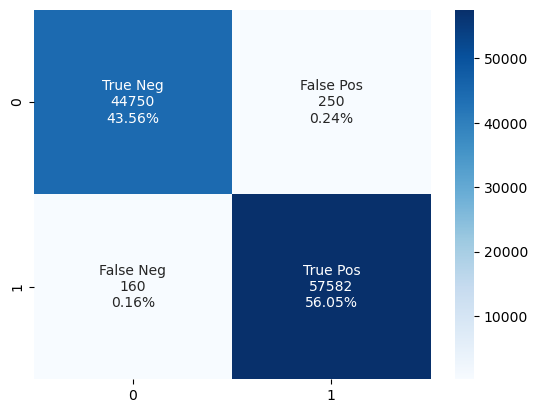

In [44]:
# cf_matrix = np.asarray(results(model_cat,X_train, X_valid, y_train, y_valid))
def plot_confusion(cf_matrix):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                        cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.clf()
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    plt.show()

plot_confusion(cf_matrix)


# Model trained on first temporal sequence of data, predict on remaining data

In [45]:
X = encoded_df.drop(['venueid','link','level1cat'],axis=1)
X_train_pos = encoded_df_pos[:int(0.75*len(encoded_df_pos))]
X_valid_pos = encoded_df_pos[int(0.75*len(encoded_df_pos)):]
X_train_neg = encoded_df_neg[:int(0.75*len(encoded_df_neg))]
X_valid_neg = encoded_df_neg[int(0.75*len(encoded_df_neg)):]
X_train_total = X_train_pos.append(X_train_neg)
X_valid_total = X_valid_pos.append(X_valid_neg)

X_train_total = X_train_total.sample(frac=1).reset_index(drop=True)
X_valid_total = X_valid_total.sample(frac=1).reset_index(drop=True)

y_train_total = X_train_total['link']
y_valid_total = X_valid_total['link']
X_train_total = X_train_total.drop(['venueid','link','level1cat'],axis=1)
X_valid_total = X_valid_total.drop(['venueid','link','level1cat'],axis=1)


Learning rate set to 0.119036
0:	learn: 0.9934547	total: 693ms	remaining: 11m 32s
100:	learn: 0.9998392	total: 33.3s	remaining: 4m 56s
200:	learn: 0.9998748	total: 1m 3s	remaining: 4m 13s
300:	learn: 0.9998870	total: 1m 27s	remaining: 3m 23s
400:	learn: 0.9998936	total: 1m 49s	remaining: 2m 42s
500:	learn: 0.9998984	total: 2m 10s	remaining: 2m 10s
600:	learn: 0.9999020	total: 2m 31s	remaining: 1m 40s
700:	learn: 0.9999034	total: 2m 50s	remaining: 1m 12s
800:	learn: 0.9999056	total: 3m 11s	remaining: 47.5s
900:	learn: 0.9999075	total: 3m 32s	remaining: 23.3s
999:	learn: 0.9999075	total: 3m 51s	remaining: 0us
0.9945408121952439
0.9990948112243409
0.9610480621362247
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     45000
           1       0.99      0.94      0.96     57742

    accuracy                           0.96    102742
   macro avg       0.96      0.96      0.96    102742
weighted avg       0.96      0.96      0.96    102742



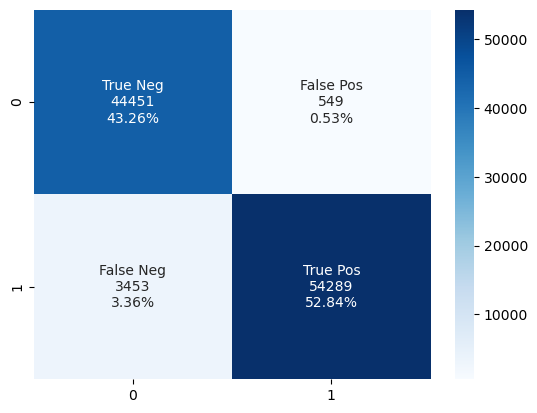

In [46]:
model_cat.fit(X_train_total,y_train_total)
cf_matrix = results(model_cat,X_train_total, X_valid_total, y_train_total, y_valid_total)
plot_confusion(cf_matrix)

# Logreg on entire dataset

In [47]:
#Log reg
model1 = LogisticRegressionCV(Cs = 100,cv=5,penalty = 'l2',
                              solver='saga', 
                              tol=0.01, n_jobs=-1, 
                              random_state = 42).fit(X_train, y_train)
soft_probs = model1.predict_proba(X_valid)
valid_auc = roc_auc_score(y_valid, soft_probs[:,1])
print(valid_auc)
score = model1.score(X_valid, y_valid)
print(score)


0.980079682803582
0.9435284499036422


0.980079682803582
0.9440567381408915
0.9435284499036422
              precision    recall  f1-score   support

           0       0.95      0.91      0.93     45000
           1       0.94      0.97      0.95     57742

    accuracy                           0.94    102742
   macro avg       0.95      0.94      0.94    102742
weighted avg       0.94      0.94      0.94    102742



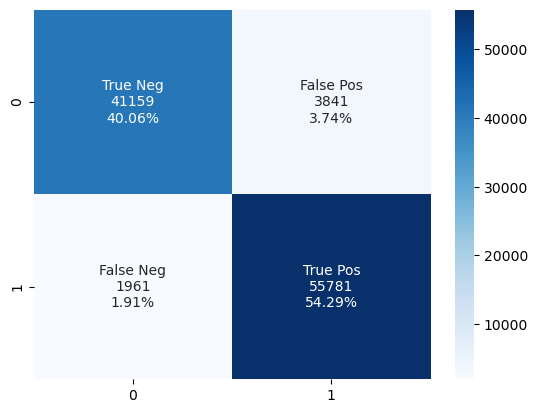

In [48]:
cf_matrix = results(model1,X_train, X_valid, y_train, y_valid)
plot_confusion(cf_matrix)

# Logreg on timeline data

In [49]:
model1 = LogisticRegressionCV(Cs = 100,cv=5,penalty = 'l2',
                              solver='saga', 
                              tol=0.01, n_jobs=-1, 
                              random_state = 42).fit(X_train_total, y_train_total)
soft_probs = model1.predict_proba(X_valid_total)
valid_auc = roc_auc_score(y_valid_total, soft_probs[:,1])
print(valid_auc)
score = model1.score(X_valid_total, y_valid_total)
print(score)

0.9862981353838337
0.9538747542387729


0.9862981353838337
0.94725572069573
0.9538747542387729
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     45000
           1       0.95      0.96      0.96     57742

    accuracy                           0.95    102742
   macro avg       0.95      0.95      0.95    102742
weighted avg       0.95      0.95      0.95    102742



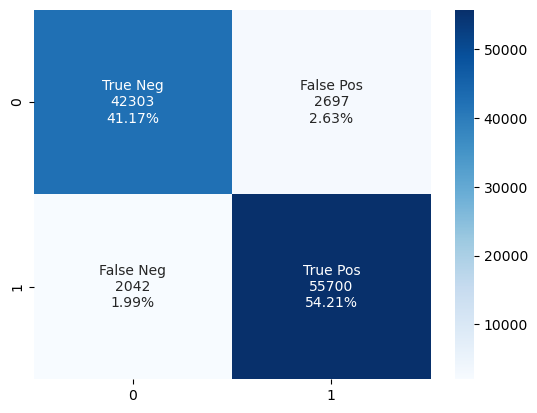

In [50]:
cf_matrix = results(model1,X_train_total, X_valid_total, y_train_total, y_valid_total)
plot_confusion(cf_matrix)